# CH4

## 최소 제곱법

In [2]:
import numpy as np
x = np.array([2, 4, 6, 8]) # 공부한 시간
y = np.array([81, 93, 91, 97]) # 점수

In [3]:
mx = np.mean(x)
my = np.mean(y)

In [5]:
divisor = sum((x-mx)**2)
divisor

20.0

In [6]:
numerator = sum(np.multiply(x-mx,y-my))
numerator

46.0

In [7]:
a = numerator/divisor
a

2.3

## 평균제곱오차 (Mean Squared Error: MSE)

In [8]:
fake_a = 3
fake_b = 76

def predict(x):
    return fake_a * x + fake_b

In [9]:
predict_result = []

In [10]:
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(f'공부시간={x[i]}, 실제 점수={y[i]}, 예측 점수={predict(x[i])}')

공부시간=2, 실제 점수=81, 예측 점수=82
공부시간=4, 실제 점수=93, 예측 점수=88
공부시간=6, 실제 점수=91, 예측 점수=94
공부시간=8, 실제 점수=97, 예측 점수=100


In [11]:
n = len(x)
def mse(y, y_pred):
    return (1/n)*sum((y-y_pred)**2)

In [12]:
print(f"MSE={mse(y, predict_result)}")

MSE=11.0


# CH5

- 경사하강법: 오차의 변화에 따라 이차함수 그래프를 만들고 적절한 학습률을 설정해 미분값이 0인 지점을 구하는 것

In [14]:
# a, b값 초기화
a = 0
b = 0

y_pred = a * x + b
error = y - y_pred

a_diff = (2/n) * sum(-x *(error))
b_diff = (2/n) * sum(-(error))

In [16]:
lr = 0.03
a = a - lr * a_diff
b = b - lr * b_diff
a,b

(55.68, 10.86)

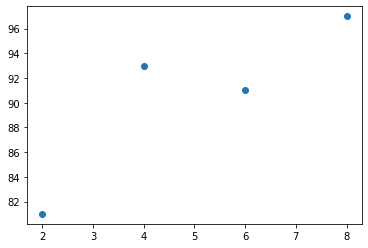

epoch=0, 기울기(a)=27.84, 절편(b)=5.43
epoch=100, 기울기(a)=7.073858435872394, 절편(b)=50.51166161138297
epoch=200, 기울기(a)=4.095999380762421, 절편(b)=68.28224379060177
epoch=300, 기울기(a)=2.9756829100119027, 절편(b)=74.96781336233505
epoch=400, 기울기(a)=2.5542024233262106, 절편(b)=77.48302865233052
epoch=500, 기울기(a)=2.3956349066513707, 절편(b)=78.42929177728175
epoch=600, 기울기(a)=2.3359793398132864, 절편(b)=78.78529068727728
epoch=700, 기울기(a)=2.313535987420573, 절편(b)=78.91922301600925
epoch=800, 기울기(a)=2.3050924490666174, 절편(b)=78.96961044185792
epoch=900, 기울기(a)=2.3019158585694823, 절편(b)=78.98856697541248
epoch=1000, 기울기(a)=2.3007207758016315, 절편(b)=78.99569871827002
epoch=1100, 기울기(a)=2.300271167070735, 절편(b)=78.99838179089187
epoch=1200, 기울기(a)=2.3001020172709508, 절편(b)=78.9993912045567
epoch=1300, 기울기(a)=2.300038380484562, 절편(b)=78.99977096168232
epoch=1400, 기울기(a)=2.3000144393354365, 절편(b)=78.9999138322214
epoch=1500, 기울기(a)=2.3000054323026444, 절편(b)=78.99996758234106
epoch=1600, 기울기(a)=2.300002043716771,

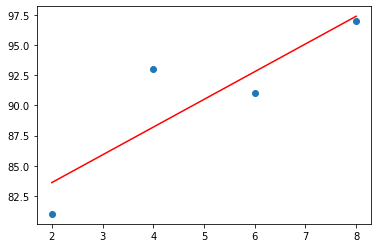

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

a = 0
b = 0
lr = 0.03

epochs = 2001
n = len(x)

for i in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    
    a_diff = (2/n) * sum(-x *(error))
    b_diff = (2/n) * sum(-(error))  
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i%100 == 0:
        print(f'epoch={i}, 기울기(a)={a}, 절편(b)={b}')

y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred, 'r')

plt.show()
    

## 다중선형회귀

In [20]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])


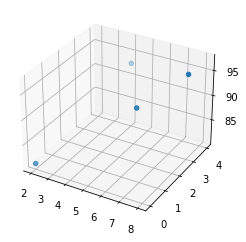

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

## 텐서플로에서 실행하는 선형회귀, 다중회귀 모델

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])


model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=2000)

Epoch 1/2000


2022-08-12 23:12:04.159175: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-12 23:12:04.416222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 8842.7783
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 2128.7903
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 1137.3446
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 986.4322
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 959.0071
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 949.7534
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 943.2025
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 937.0822
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 931.0585
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 925.0822
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 919.1459
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 913.2481
Epoch 13/2000
1/1 [================